<a href="https://www.kaggle.com/code/abdulaziz04/prediction-using-catboostregressor?scriptVersionId=101228155" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#Linear Regression Models from sklearn
from sklearn.linear_model import LinearRegression,SGDRegressor,ElasticNet,BayesianRidge
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold,cross_val_score


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
pd.set_option('max_rows',1000)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
X=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
xtest=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
sample=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [3]:
y=X['SalePrice']
ids=xtest['Id']


In [4]:
X.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

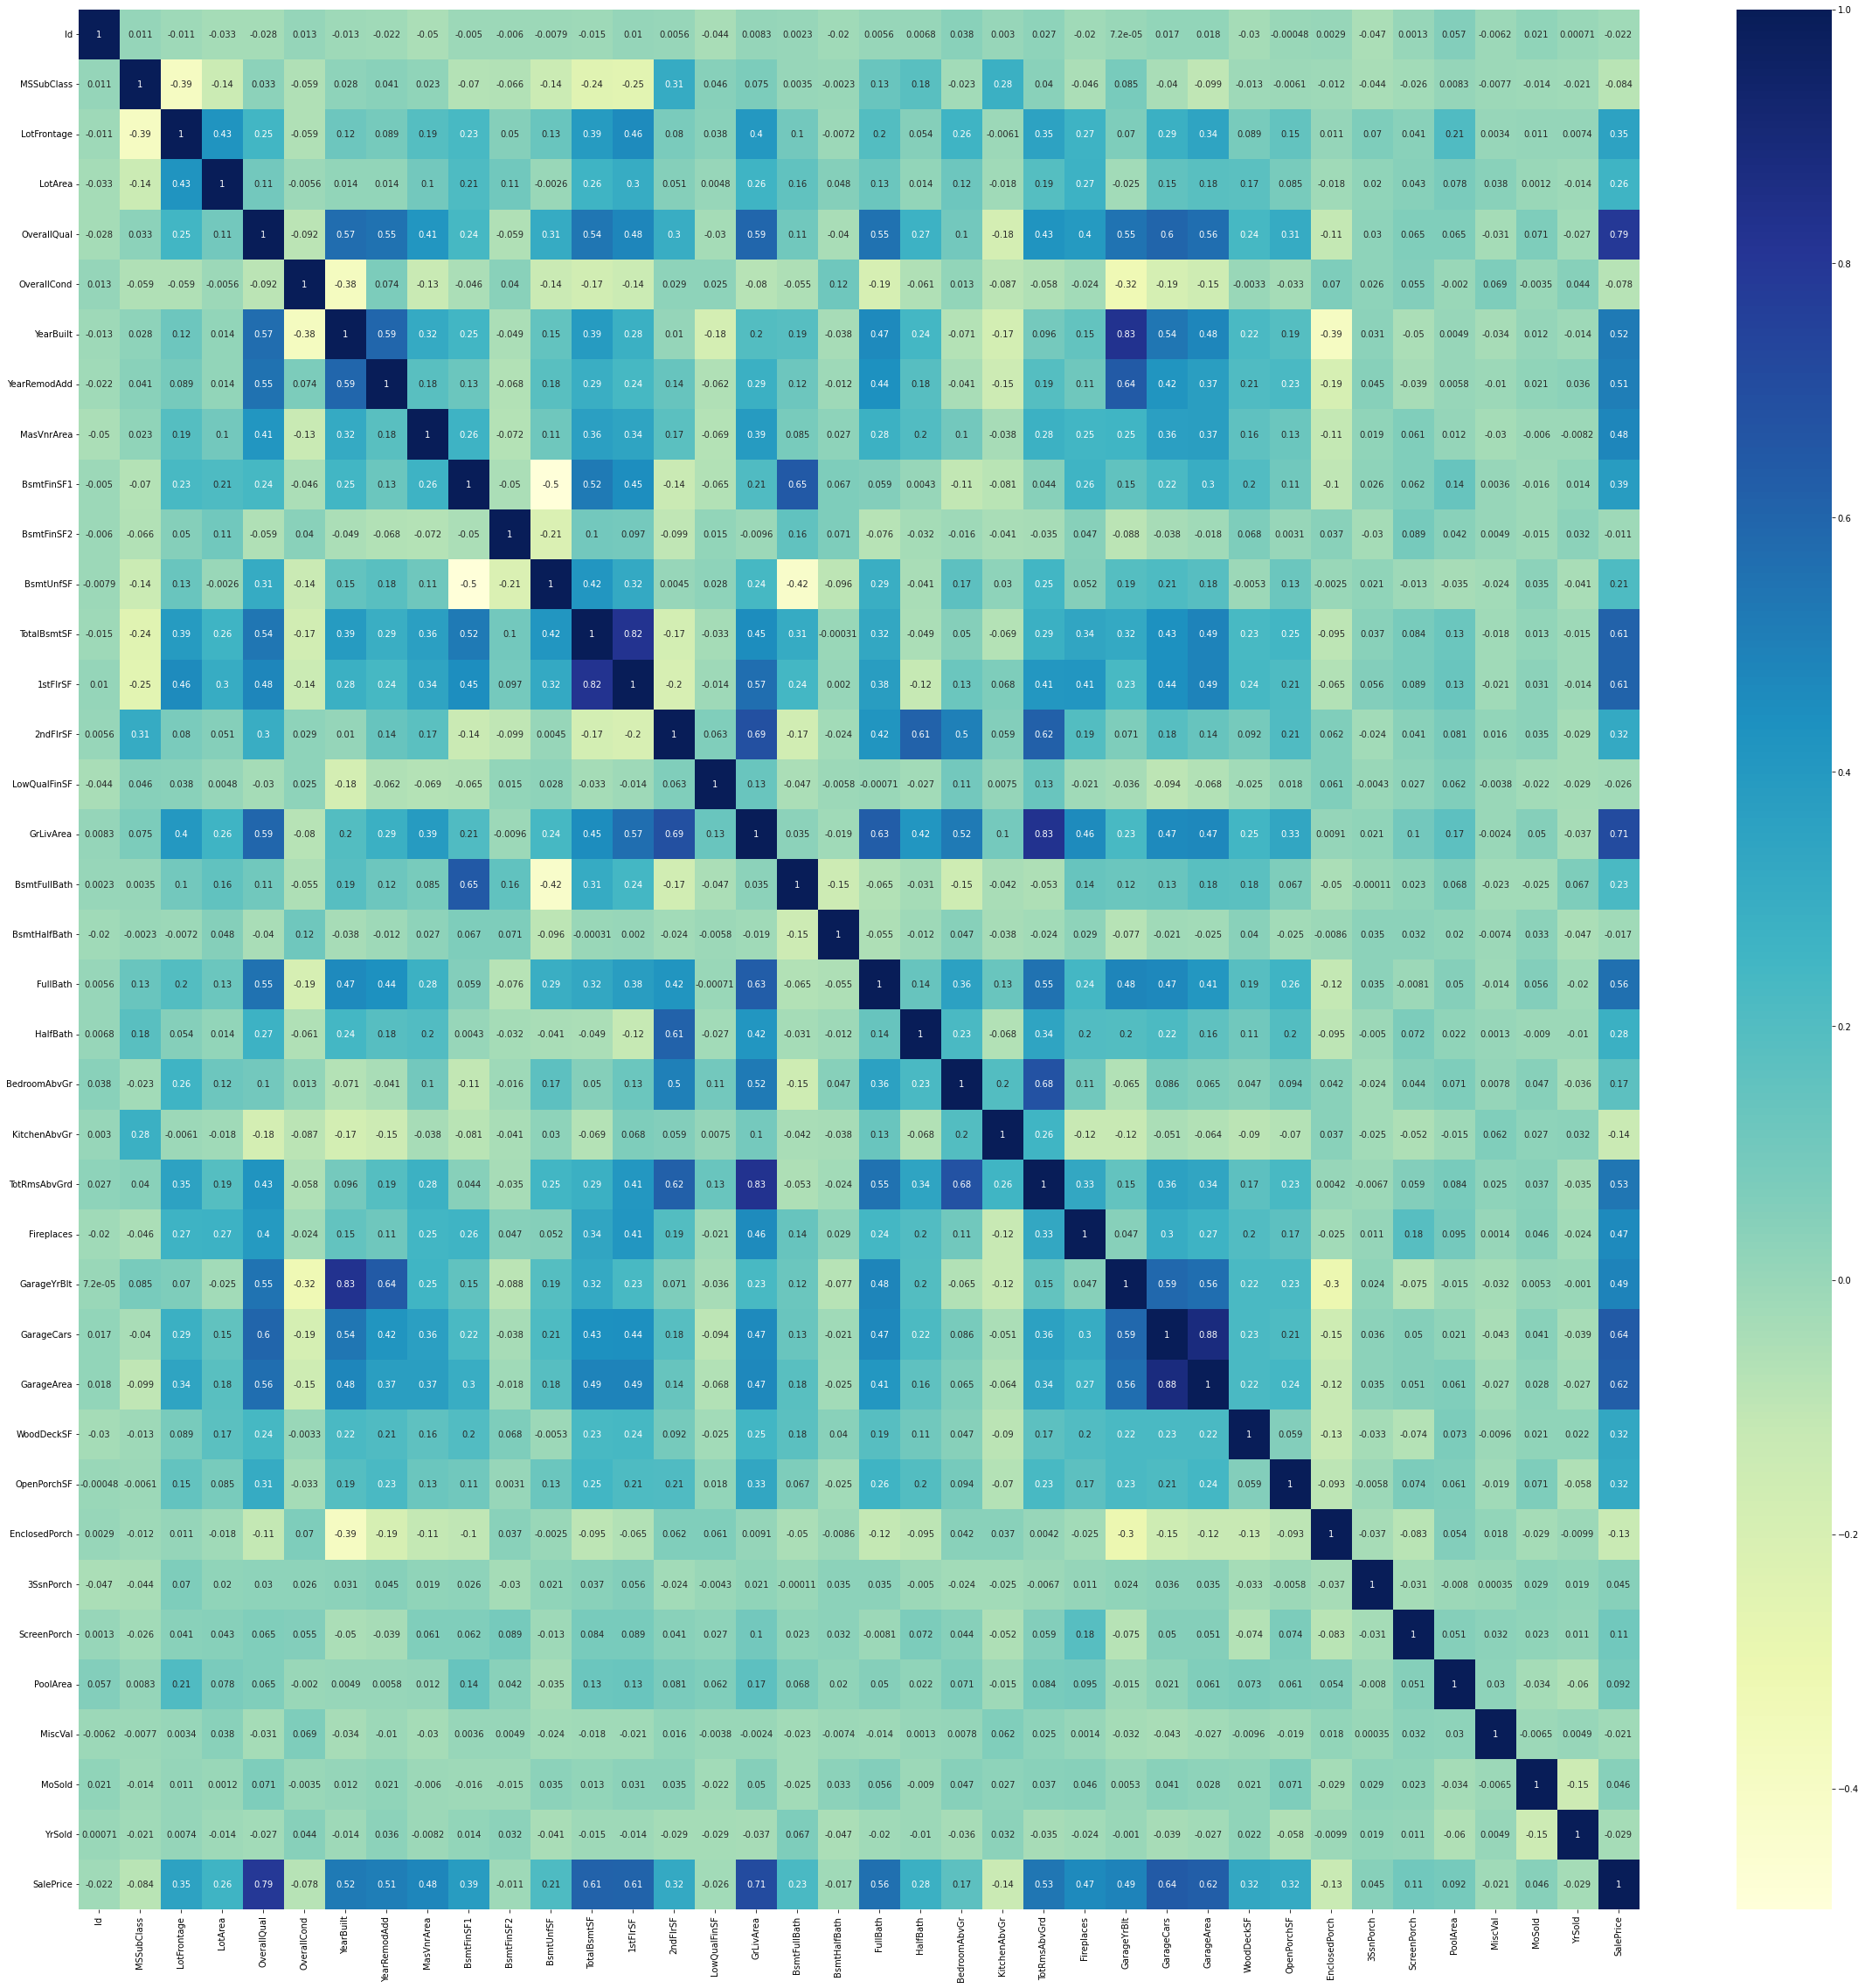

In [5]:
plt.figure(figsize=(40,40))
corr=X.corr()
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)

# displaying heatmap
#figure = dataplot.get_figure()    
#figure.savefig('corr_heatmap.png', dpi=400)
plt.show()

In [6]:
features=corr[corr['SalePrice']>0.3].index.tolist()
features=features[:-1]
features

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [7]:
xtrain=X[features]
xtest=xtest[features]
xtrain.isnull().sum()


LotFrontage     259
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
dtype: int64

(array([ 73., 132., 295., 348., 219.,  79.,  29.,  11.,   7.,   2.,   3.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  35.6,  50.2,  64.8,  79.4,  94. , 108.6, 123.2, 137.8,
        152.4, 167. , 181.6, 196.2, 210.8, 225.4, 240. , 254.6, 269.2,
        283.8, 298.4, 313. ]),
 <BarContainer object of 20 artists>)

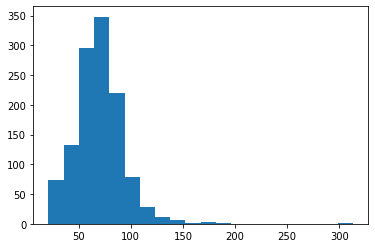

In [8]:
#LotFrontage null values to be replaced by mean, 
#as it has less outliers so we can impute accordingly
plt.hist(xtrain['LotFrontage'],bins=20)

In [9]:
xtrain.loc[:]['LotFrontage'].fillna(xtrain['LotFrontage'].mean(),inplace=True)
xtest.loc[:]['LotFrontage'].fillna(xtrain['LotFrontage'].mean(),inplace=True)
xtrain.isnull().sum()

LotFrontage      0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt     81
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
dtype: int64

(array([  6.,  28.,  49.,  52.,  93., 195., 194., 140., 190., 432.]),
 array([1900., 1911., 1922., 1933., 1944., 1955., 1966., 1977., 1988.,
        1999., 2010.]),
 <BarContainer object of 10 artists>)

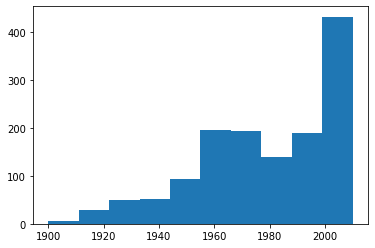

In [10]:
#Garage year built to be replaced by median as it has more outliers
plt.hist(xtrain['GarageYrBlt'])

In [11]:
xtrain.loc[:]['GarageYrBlt'].fillna(xtrain['GarageYrBlt'].median(),inplace=True)
xtest.loc[:]['GarageYrBlt'].fillna(xtrain['GarageYrBlt'].median(),inplace=True)
xtrain.isnull().sum()

LotFrontage     0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      8
BsmtFinSF1      0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

In [12]:
xtest.fillna(0,inplace=True)

(array([939., 138., 126.,  93.,  56.,  38.,  13.,  16.,  10.,   9.,   3.,
          3.,   2.,   2.,   2.,   0.,   0.,   1.,   0.,   1.]),
 array([   0.,   80.,  160.,  240.,  320.,  400.,  480.,  560.,  640.,
         720.,  800.,  880.,  960., 1040., 1120., 1200., 1280., 1360.,
        1440., 1520., 1600.]),
 <BarContainer object of 20 artists>)

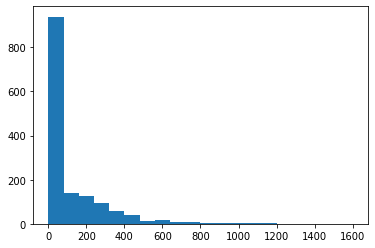

In [13]:
#Replacing the missing values with mode
plt.hist(xtrain['MasVnrArea'],bins=20)


In [14]:
xtrain.loc[:]['MasVnrArea'].fillna(xtrain['MasVnrArea'].mode()[0],inplace=True)
xtest.loc[:]['MasVnrArea'].fillna(xtrain['MasVnrArea'].mode()[0],inplace=True)
xtrain.isnull().sum()

LotFrontage     0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

In [15]:
cgb=CatBoostRegressor()
cgb.fit(xtrain,y)

Learning rate set to 0.043466
0:	learn: 77096.2925474	total: 60.1ms	remaining: 1m
1:	learn: 74777.3282001	total: 62.2ms	remaining: 31s
2:	learn: 72665.5919987	total: 64.1ms	remaining: 21.3s
3:	learn: 70598.4552801	total: 66.1ms	remaining: 16.5s
4:	learn: 68650.9432137	total: 68.2ms	remaining: 13.6s
5:	learn: 66857.7092792	total: 70.3ms	remaining: 11.6s
6:	learn: 65160.4204500	total: 72.1ms	remaining: 10.2s
7:	learn: 63584.9485422	total: 74ms	remaining: 9.18s
8:	learn: 61921.6847518	total: 76ms	remaining: 8.37s
9:	learn: 60433.6952880	total: 77.8ms	remaining: 7.7s
10:	learn: 59060.2353470	total: 79.6ms	remaining: 7.16s
11:	learn: 57733.6393284	total: 81.5ms	remaining: 6.71s
12:	learn: 56537.2422809	total: 83.4ms	remaining: 6.33s
13:	learn: 55170.7891115	total: 85.4ms	remaining: 6.01s
14:	learn: 53867.5199367	total: 87.2ms	remaining: 5.73s
15:	learn: 52653.6796402	total: 89.1ms	remaining: 5.48s
16:	learn: 51588.7886951	total: 90.9ms	remaining: 5.25s
17:	learn: 50492.4403673	total: 92.7ms

In [16]:
np.mean(cross_val_score(cgb, xtrain, y, cv=5, n_jobs=-1))

Learning rate set to 0.04196
0:	learn: 78431.6440110	total: 65.2ms	remaining: 1m 5s
1:	learn: 76313.3618601	total: 72.4ms	remaining: 36.1s
2:	learn: 74203.5780033	total: 93.6ms	remaining: 31.1s
3:	learn: 72224.2766271	total: 111ms	remaining: 27.6s
4:	learn: 70321.0904095	total: 129ms	remaining: 25.6s
5:	learn: 68651.1811100	total: 136ms	remaining: 22.6s
6:	learn: 67073.4256967	total: 155ms	remaining: 22s
7:	learn: 65553.5262052	total: 175ms	remaining: 21.7s
8:	learn: 63867.7199113	total: 187ms	remaining: 20.6s
9:	learn: 62398.2817452	total: 206ms	remaining: 20.4s
10:	learn: 60987.4175648	total: 227ms	remaining: 20.4s
11:	learn: 59611.0846199	total: 232ms	remaining: 19.1s
12:	learn: 58397.7193192	total: 235ms	remaining: 17.8s
13:	learn: 57187.9902647	total: 238ms	remaining: 16.8s
14:	learn: 55946.9124829	total: 241ms	remaining: 15.8s
15:	learn: 54706.1978205	total: 243ms	remaining: 14.9s
16:	learn: 53556.6598115	total: 246ms	remaining: 14.2s
17:	learn: 52424.3552505	total: 249ms	remaini

0.8671731652617851

In [17]:
xtest.isnull().sum()

LotFrontage     0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

In [18]:
results=cgb.predict(xtest)
results=pd.DataFrame({'Id':ids,'SalePrice':results})
results.to_csv('submission.csv',index=False)